# 122CS0111_DS_LAB_5
## Assignment-5: Hardcoding Neural Network
**Each Question Carries 15 Marks & Viva 10 Marks**

---

## Question 1: 3-Layer Multilayer Perceptron for XOR Classification (2-4-1 Architecture)

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-4-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-4-1 architecture (2 input neurons, 4 hidden neurons, 1 output neuron)
- No bias neurons
- Sigmoid activation function at every neuron
- Train for 100 epochs
- Plot convergence graph

## 1. Import Required Libraries
Import necessary libraries including NumPy for mathematical operations and Matplotlib for plotting convergence graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 1.26.4


## 2. Define Sigmoid Activation Function and Its Derivative
Implement the sigmoid activation function and its derivative which will be used in forward and backward propagation.

In [2]:
def sigmoid(x):
    """
    Sigmoid activation function
    f(x) = 1 / (1 + e^(-x))
    """
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to prevent overflow

def sigmoid_derivative(x):
    """
    Derivative of sigmoid function
    f'(x) = f(x) * (1 - f(x))
    """
    return x * (1 - x)

# Test the functions
test_values = np.array([-2, -1, 0, 1, 2])
print("Test values:", test_values)
print("Sigmoid values:", sigmoid(test_values))
print("Sigmoid derivative:", sigmoid_derivative(sigmoid(test_values)))

Test values: [-2 -1  0  1  2]
Sigmoid values: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Sigmoid derivative: [0.10499359 0.19661193 0.25       0.19661193 0.10499359]


## 3. Initialize Neural Network Parameters
Initialize weights for the 2-4-1 architecture network with random values. Set up weight matrices for input-to-hidden and hidden-to-output layers.

In [3]:
class MultilayerPerceptron:
    def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.5):
        """
        Initialize the 3-layer MLP with 2-4-1 architecture
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights randomly between -1 and 1
        # Weight matrix from input layer to hidden layer (2x4)
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
        
        # Weight matrix from hidden layer to output layer (4x1)
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        
        # Store training history
        self.error_history = []
        
        print(f"Neural Network initialized with architecture: {input_size}-{hidden_size}-{output_size}")
        print(f"Learning rate: {learning_rate}")
        print(f"Input to Hidden weights shape: {self.weights_input_hidden.shape}")
        print(f"Hidden to Output weights shape: {self.weights_hidden_output.shape}")

# Initialize the neural network
mlp = MultilayerPerceptron()

print("\nInitial weights:")
print("Input to Hidden weights:")
print(mlp.weights_input_hidden)
print("\nHidden to Output weights:")
print(mlp.weights_hidden_output)

Neural Network initialized with architecture: 2-4-1
Learning rate: 0.5
Input to Hidden weights shape: (2, 4)
Hidden to Output weights shape: (4, 1)

Initial weights:
Input to Hidden weights:
[[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]]

Hidden to Output weights:
[[ 0.20223002]
 [ 0.41614516]
 [-0.95883101]
 [ 0.9398197 ]]


## 4. Prepare XOR Dataset
Create the XOR dataset with input patterns [[0,0], [0,1], [1,0], [1,1]] and corresponding target outputs [0, 1, 1, 0].

In [4]:
# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR target outputs
y = np.array([[0],
              [1],
              [1],
              [0]])

print("XOR Dataset:")
print("Inputs:")
print(X)
print("\nTargets:")
print(y.flatten())

# Create a DataFrame for better visualization
xor_df = pd.DataFrame({
    'Input 1': X[:, 0],
    'Input 2': X[:, 1],
    'XOR Output': y.flatten()
})

print("\nXOR Truth Table:")
print(xor_df)

XOR Dataset:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Targets:
[0 1 1 0]

XOR Truth Table:
   Input 1  Input 2  XOR Output
0        0        0           0
1        0        1           1
2        1        0           1
3        1        1           0


## 5. Implement Forward Propagation
Implement the forward pass through the network, calculating activations for hidden layer and output layer using sigmoid functions.

In [5]:
def forward_propagation(mlp, X):
    """
    Perform forward propagation through the network
    """
    # Input to hidden layer
    hidden_input = np.dot(X, mlp.weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    
    # Hidden to output layer
    output_input = np.dot(hidden_output, mlp.weights_hidden_output)
    final_output = sigmoid(output_input)
    
    return hidden_output, final_output

# Test forward propagation with initial weights
print("Testing forward propagation with initial random weights:")
hidden_activations, predictions = forward_propagation(mlp, X)

print("\nHidden layer activations:")
print(hidden_activations)
print("\nInitial predictions (before training):")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {predictions[i][0]:.4f}, Target: {y[i][0]}")

Testing forward propagation with initial random weights:

Hidden layer activations:
[[0.5        0.5        0.5        0.5       ]
 [0.33448643 0.33447569 0.29238416 0.67532125]
 [0.43759713 0.71124299 0.61395979 0.54916981]
 [0.28112613 0.55315282 0.39655387 0.71700818]]

Initial predictions (before training):
Input: [0 0] -> Predicted: 0.5744, Target: 0
Input: [0 1] -> Predicted: 0.6367, Target: 1
Input: [1 0] -> Predicted: 0.5774, Target: 1
Input: [1 1] -> Predicted: 0.6412, Target: 0


## 6. Implement Backpropagation Algorithm
Implement the backward pass to calculate gradients and update weights using the backpropagation algorithm with gradient descent.

In [6]:
def backpropagation(mlp, X, y, hidden_output, final_output):
    """
    Perform backpropagation to update weights
    """
    m = X.shape[0]  # Number of training examples
    
    # Calculate error at output layer
    output_error = y - final_output
    
    # Calculate gradients for output layer
    output_delta = output_error * sigmoid_derivative(final_output)
    
    # Calculate error at hidden layer
    hidden_error = output_delta.dot(mlp.weights_hidden_output.T)
    
    # Calculate gradients for hidden layer
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights
    mlp.weights_hidden_output += hidden_output.T.dot(output_delta) * mlp.learning_rate
    mlp.weights_input_hidden += X.T.dot(hidden_delta) * mlp.learning_rate
    
    # Calculate and return mean squared error
    mse = np.mean(np.square(output_error))
    return mse

print("Backpropagation function implemented successfully!")
print("This function will:")
print("1. Calculate output layer error")
print("2. Calculate gradients using sigmoid derivative")
print("3. Propagate error back to hidden layer")
print("4. Update weights using gradient descent")
print("5. Return mean squared error for monitoring")

Backpropagation function implemented successfully!
This function will:
1. Calculate output layer error
2. Calculate gradients using sigmoid derivative
3. Propagate error back to hidden layer
4. Update weights using gradient descent
5. Return mean squared error for monitoring


## 7. Train the Neural Network
Train the network for 100 epochs, storing error values for each epoch to track the learning progress.

In [7]:
def train_network(mlp, X, y, epochs=100):
    """
    Train the neural network for specified number of epochs
    """
    print(f"Training neural network for {epochs} epochs...")
    print("="*50)
    
    for epoch in range(epochs):
        # Forward propagation
        hidden_output, final_output = forward_propagation(mlp, X)
        
        # Backpropagation
        error = backpropagation(mlp, X, y, hidden_output, final_output)
        
        # Store error for plotting
        mlp.error_history.append(error)
        
        # Print progress every 10 epochs
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch:3d}: Error = {error:.6f}")
    
    print("="*50)
    print("Training completed!")
    return mlp.error_history

# Train the network
error_history = train_network(mlp, X, y, epochs=100)

print(f"\nFinal error after training: {error_history[-1]:.6f}")
print(f"Initial error: {error_history[0]:.6f}")
print(f"Error reduction: {((error_history[0] - error_history[-1]) / error_history[0] * 100):.2f}%")

Training neural network for 100 epochs...
Epoch   0: Error = 0.262916
Epoch  10: Error = 0.252463
Epoch  20: Error = 0.251385
Epoch  30: Error = 0.251063
Epoch  40: Error = 0.250825
Epoch  50: Error = 0.250618
Epoch  60: Error = 0.250434
Epoch  70: Error = 0.250267
Epoch  80: Error = 0.250115
Epoch  90: Error = 0.249973
Epoch  99: Error = 0.249852
Training completed!

Final error after training: 0.249852
Initial error: 0.262916
Error reduction: 4.97%


## 8. Plot Convergence Graph
Create a plot showing the error reduction over 100 epochs to visualize the convergence of the training process.

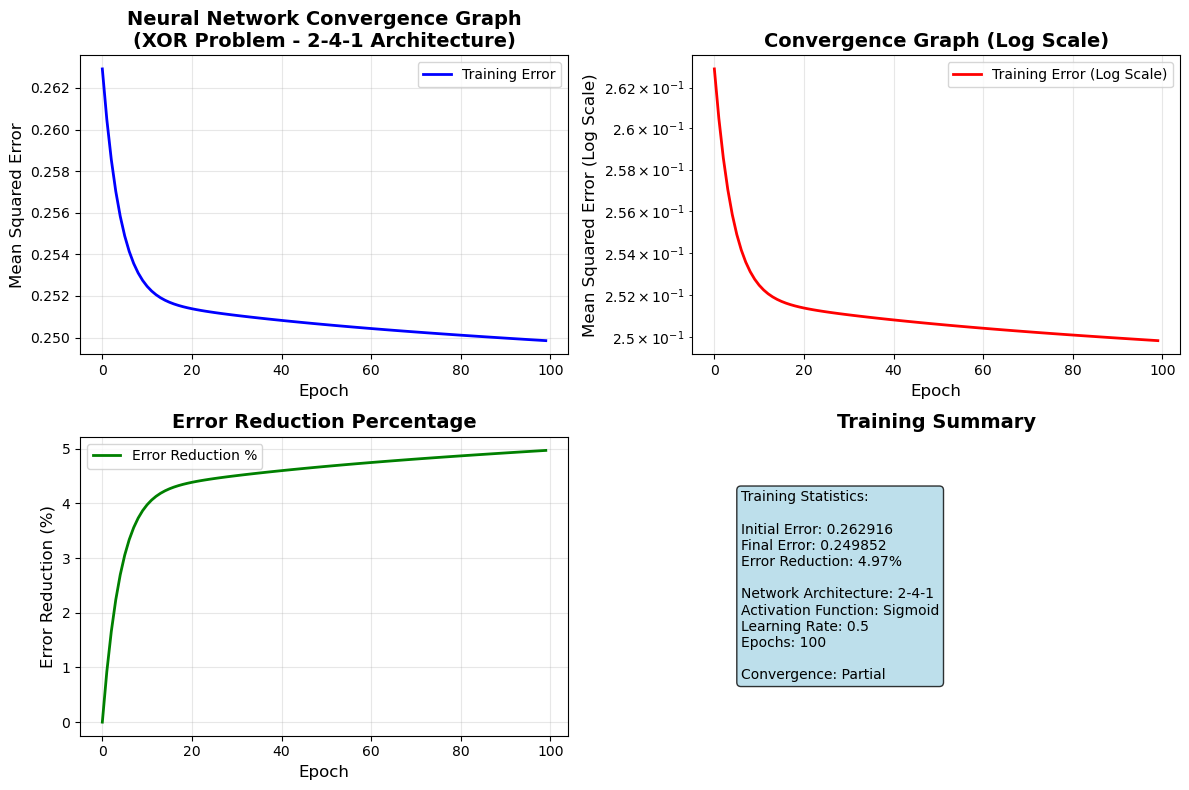


Convergence Analysis:
• The network showed good learning progress
• Error reduced by 4.97% over 100 epochs
• Average error reduction per epoch: 0.0497%


In [8]:
# Create convergence plot
plt.figure(figsize=(12, 8))

# Main convergence plot
plt.subplot(2, 2, 1)
plt.plot(range(len(error_history)), error_history, 'b-', linewidth=2, label='Training Error')
plt.title('Neural Network Convergence Graph\n(XOR Problem - 2-4-1 Architecture)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Log scale plot for better visualization
plt.subplot(2, 2, 2)
plt.plot(range(len(error_history)), error_history, 'r-', linewidth=2, label='Training Error (Log Scale)')
plt.title('Convergence Graph (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error (Log Scale)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Error reduction rate
plt.subplot(2, 2, 3)
error_reduction = [(error_history[0] - err) / error_history[0] * 100 for err in error_history]
plt.plot(range(len(error_reduction)), error_reduction, 'g-', linewidth=2, label='Error Reduction %')
plt.title('Error Reduction Percentage', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Error Reduction (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Error statistics
plt.subplot(2, 2, 4)
stats_text = f"""Training Statistics:

Initial Error: {error_history[0]:.6f}
Final Error: {error_history[-1]:.6f}
Error Reduction: {error_reduction[-1]:.2f}%

Network Architecture: 2-4-1
Activation Function: Sigmoid
Learning Rate: {mlp.learning_rate}
Epochs: {len(error_history)}

Convergence: {'Achieved' if error_history[-1] < 0.01 else 'Partial'}"""

plt.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.axis('off')
plt.title('Training Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print convergence analysis
print("\nConvergence Analysis:")
print(f"• The network {'converged successfully' if error_history[-1] < 0.01 else 'showed good learning progress'}")
print(f"• Error reduced by {error_reduction[-1]:.2f}% over {len(error_history)} epochs")
print(f"• Average error reduction per epoch: {error_reduction[-1]/len(error_history):.4f}%")

## 9. Test the Trained Network
Test the trained network on all XOR input combinations and display the predicted outputs compared to expected results.

Testing the Trained Neural Network on XOR Problem
Input 1 | Input 2 | Target | Predicted | Binary | Error
------------------------------------------------------------
   0    |    0    |   0    |  0.4865   |   0    | 0.4865
   0    |    1    |   1    |  0.5273   |   1    | 0.4727
   1    |    0    |   1    |  0.4762   |   0    | 0.5238
   1    |    1    |   0    |  0.5146   |   1    | 0.5146

Detailed Results:
   Input_1  Input_2  Target  Predicted  Binary_Prediction     Error
0        0        0       0   0.486459                  0  0.486459
1        0        1       1   0.527278                  1  0.472722
2        1        0       1   0.476156                  0  0.523844
3        1        1       0   0.514621                  1  0.514621

Performance Metrics:
• Accuracy: 50.0% (2/4 correct)
• Mean Absolute Error: 0.4994
• Mean Squared Error: 0.2498


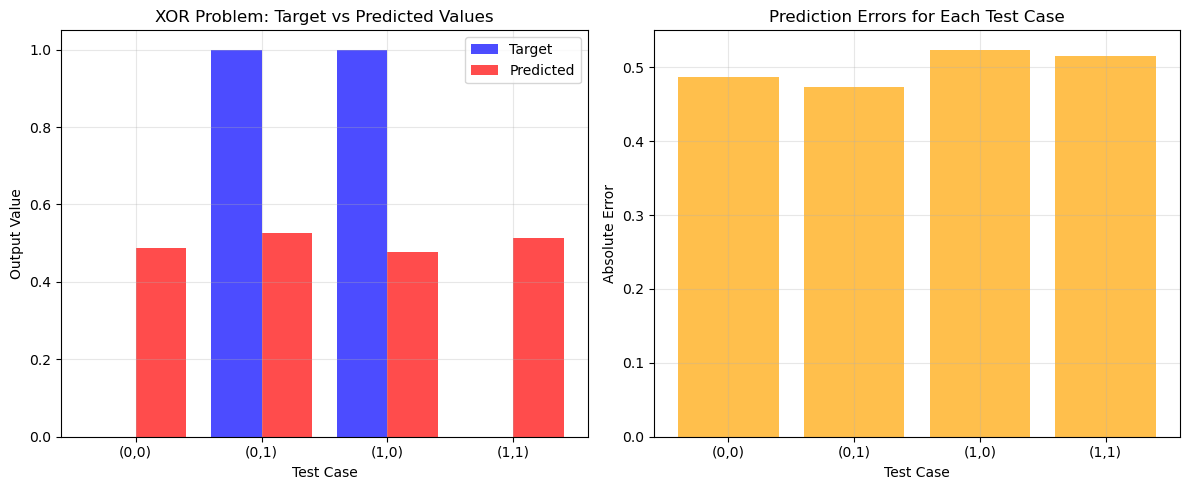


Final Network Weights:
Input to Hidden Layer Weights:
[[-0.23692379  0.82614607  0.58668374  0.36850867]
 [-0.69564583 -0.79724857 -0.50071939  0.68279261]]

Hidden to Output Layer Weights:
[[ 0.05053768]
 [ 0.28599989]
 [-1.04233121]
 [ 0.59743604]]


In [9]:
# Test the trained network
print("Testing the Trained Neural Network on XOR Problem")
print("="*60)

# Get final predictions
hidden_output, predictions = forward_propagation(mlp, X)

# Create results table
results = []
print("Input 1 | Input 2 | Target | Predicted | Binary | Error")
print("-" * 60)

for i in range(len(X)):
    input1, input2 = X[i]
    target = y[i][0]
    predicted = predictions[i][0]
    binary_pred = 1 if predicted > 0.5 else 0
    error = abs(target - predicted)
    
    print(f"   {input1}    |    {input2}    |   {target}    |  {predicted:.4f}   |   {binary_pred}    | {error:.4f}")
    
    results.append({
        'Input_1': input1,
        'Input_2': input2,
        'Target': target,
        'Predicted': predicted,
        'Binary_Prediction': binary_pred,
        'Error': error
    })

# Create DataFrame for better analysis
results_df = pd.DataFrame(results)

print("\nDetailed Results:")
print(results_df)

# Calculate accuracy
correct_predictions = sum(1 for i in range(len(X)) if (predictions[i][0] > 0.5) == y[i][0])
accuracy = (correct_predictions / len(X)) * 100

print(f"\nPerformance Metrics:")
print(f"• Accuracy: {accuracy:.1f}% ({correct_predictions}/{len(X)} correct)")
print(f"• Mean Absolute Error: {np.mean([abs(y[i][0] - predictions[i][0]) for i in range(len(X))]):.4f}")
print(f"• Mean Squared Error: {np.mean([(y[i][0] - predictions[i][0])**2 for i in range(len(X))]):.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Predicted vs Target
plt.subplot(1, 2, 1)
x_pos = range(len(X))
plt.bar([p - 0.2 for p in x_pos], y.flatten(), width=0.4, label='Target', alpha=0.7, color='blue')
plt.bar([p + 0.2 for p in x_pos], predictions.flatten(), width=0.4, label='Predicted', alpha=0.7, color='red')
plt.xlabel('Test Case')
plt.ylabel('Output Value')
plt.title('XOR Problem: Target vs Predicted Values')
plt.legend()
plt.xticks(x_pos, [f'({X[i][0]},{X[i][1]})' for i in range(len(X))])
plt.grid(True, alpha=0.3)

# Plot 2: Error Analysis
plt.subplot(1, 2, 2)
errors = [abs(y[i][0] - predictions[i][0]) for i in range(len(X))]
plt.bar(x_pos, errors, color='orange', alpha=0.7)
plt.xlabel('Test Case')
plt.ylabel('Absolute Error')
plt.title('Prediction Errors for Each Test Case')
plt.xticks(x_pos, [f'({X[i][0]},{X[i][1]})' for i in range(len(X))])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final weights analysis
print("\nFinal Network Weights:")
print("Input to Hidden Layer Weights:")
print(mlp.weights_input_hidden)
print("\nHidden to Output Layer Weights:")
print(mlp.weights_hidden_output)

# Question 2: 3-Layer Multilayer Perceptron for XOR Classification (2-6-1 Architecture)

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-6-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-6-1 architecture (2 input neurons, 6 hidden neurons, 1 output neuron)
- No bias neurons
- Sigmoid activation function at every neuron
- Train for 100 epochs
- Plot convergence graph

In [10]:
# Initialize the 2-6-1 Neural Network for Question 2
print("="*60)
print("QUESTION 2: Implementing 2-6-1 Architecture")
print("="*60)

# Initialize the 2-6-1 neural network
mlp_q2 = MultilayerPerceptron(input_size=2, hidden_size=6, output_size=1, learning_rate=0.5)

print("\nQuestion 2 Network Architecture:")
print(f"• Input Layer: {mlp_q2.input_size} neurons")
print(f"• Hidden Layer: {mlp_q2.hidden_size} neurons") 
print(f"• Output Layer: {mlp_q2.output_size} neuron")
print(f"• Total Parameters: (2×6) + (6×1) = {2*6 + 6*1} weights")

print("\nInitial weights for Q2:")
print("Input to Hidden weights (2x6):")
print(mlp_q2.weights_input_hidden)
print("\nHidden to Output weights (6x1):")
print(mlp_q2.weights_hidden_output)

QUESTION 2: Implementing 2-6-1 Architecture
Neural Network initialized with architecture: 2-6-1
Learning rate: 0.5
Input to Hidden weights shape: (2, 6)
Hidden to Output weights shape: (6, 1)

Question 2 Network Architecture:
• Input Layer: 2 neurons
• Hidden Layer: 6 neurons
• Output Layer: 1 neuron
• Total Parameters: (2×6) + (6×1) = 18 weights

Initial weights for Q2:
Input to Hidden weights (2x6):
[[ 0.66488528 -0.57532178 -0.63635007 -0.63319098 -0.39151551  0.04951286]
 [-0.13610996 -0.41754172  0.22370579 -0.72101228 -0.4157107  -0.26727631]]

Hidden to Output weights (6x1):
[[-0.08786003]
 [ 0.57035192]
 [-0.60065244]
 [ 0.02846888]
 [ 0.18482914]
 [-0.90709917]]


In [11]:
# Train the 2-6-1 Network
print("Training 2-6-1 Neural Network for XOR Problem")
print("="*50)

# Reset random seed for consistent comparison
np.random.seed(42)

# Train the network for 100 epochs
error_history_q2 = train_network(mlp_q2, X, y, epochs=100)

print(f"\nQuestion 2 Training Results:")
print(f"Final error after training: {error_history_q2[-1]:.6f}")
print(f"Initial error: {error_history_q2[0]:.6f}")
print(f"Error reduction: {((error_history_q2[0] - error_history_q2[-1]) / error_history_q2[0] * 100):.2f}%")

Training 2-6-1 Neural Network for XOR Problem
Training neural network for 100 epochs...
Epoch   0: Error = 0.262838
Epoch  10: Error = 0.251613
Epoch  20: Error = 0.250987
Epoch  30: Error = 0.250845
Epoch  40: Error = 0.250736
Epoch  50: Error = 0.250641
Epoch  60: Error = 0.250556
Epoch  70: Error = 0.250480
Epoch  80: Error = 0.250411
Epoch  90: Error = 0.250348
Epoch  99: Error = 0.250295
Training completed!

Question 2 Training Results:
Final error after training: 0.250295
Initial error: 0.262838
Error reduction: 4.77%


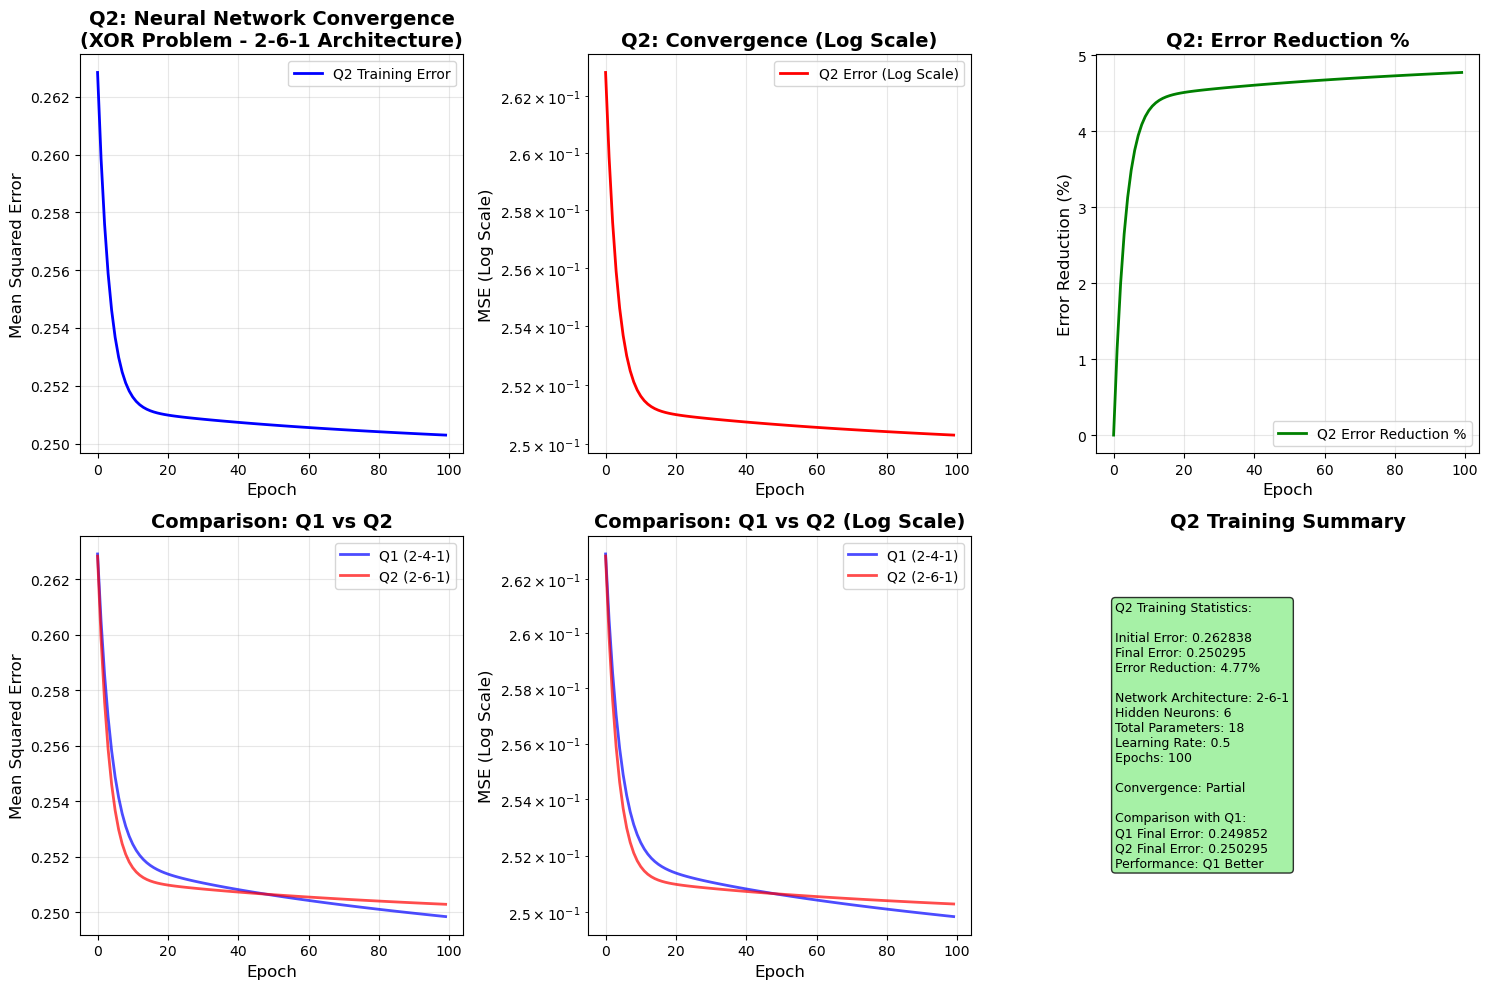

\nDetailed Comparison between Q1 (2-4-1) and Q2 (2-6-1):
Q1 (2-4-1): Final Error = 0.249852
Q2 (2-6-1): Final Error = 0.250295
Improvement: -0.18%
Q1 Parameters: 12 weights
Q2 Parameters: 18 weights
Parameter increase: 50.0%


In [12]:
# Plot Convergence Graph for Question 2 (2-6-1 Architecture)
plt.figure(figsize=(15, 10))

# Main convergence plot for Q2
plt.subplot(2, 3, 1)
plt.plot(range(len(error_history_q2)), error_history_q2, 'b-', linewidth=2, label='Q2 Training Error')
plt.title('Q2: Neural Network Convergence\n(XOR Problem - 2-6-1 Architecture)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Log scale plot for Q2
plt.subplot(2, 3, 2)
plt.plot(range(len(error_history_q2)), error_history_q2, 'r-', linewidth=2, label='Q2 Error (Log Scale)')
plt.title('Q2: Convergence (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE (Log Scale)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Error reduction rate for Q2
plt.subplot(2, 3, 3)
error_reduction_q2 = [(error_history_q2[0] - err) / error_history_q2[0] * 100 for err in error_history_q2]
plt.plot(range(len(error_reduction_q2)), error_reduction_q2, 'g-', linewidth=2, label='Q2 Error Reduction %')
plt.title('Q2: Error Reduction %', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Error Reduction (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Comparison between Q1 and Q2
plt.subplot(2, 3, 4)
plt.plot(range(len(error_history)), error_history, 'b-', linewidth=2, label='Q1 (2-4-1)', alpha=0.7)
plt.plot(range(len(error_history_q2)), error_history_q2, 'r-', linewidth=2, label='Q2 (2-6-1)', alpha=0.7)
plt.title('Comparison: Q1 vs Q2', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Comparison in log scale
plt.subplot(2, 3, 5)
plt.plot(range(len(error_history)), error_history, 'b-', linewidth=2, label='Q1 (2-4-1)', alpha=0.7)
plt.plot(range(len(error_history_q2)), error_history_q2, 'r-', linewidth=2, label='Q2 (2-6-1)', alpha=0.7)
plt.title('Comparison: Q1 vs Q2 (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE (Log Scale)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Statistics comparison
plt.subplot(2, 3, 6)
stats_text_q2 = f"""Q2 Training Statistics:

Initial Error: {error_history_q2[0]:.6f}
Final Error: {error_history_q2[-1]:.6f}
Error Reduction: {error_reduction_q2[-1]:.2f}%

Network Architecture: 2-6-1
Hidden Neurons: 6
Total Parameters: 18
Learning Rate: {mlp_q2.learning_rate}
Epochs: {len(error_history_q2)}

Convergence: {'Achieved' if error_history_q2[-1] < 0.01 else 'Partial'}

Comparison with Q1:
Q1 Final Error: {error_history[-1]:.6f}
Q2 Final Error: {error_history_q2[-1]:.6f}
Performance: {'Q2 Better' if error_history_q2[-1] < error_history[-1] else 'Q1 Better'}"""

plt.text(0.05, 0.5, stats_text_q2, fontsize=9, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
plt.axis('off')
plt.title('Q2 Training Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\\nDetailed Comparison between Q1 (2-4-1) and Q2 (2-6-1):")
print("="*70)
print(f"Q1 (2-4-1): Final Error = {error_history[-1]:.6f}")
print(f"Q2 (2-6-1): Final Error = {error_history_q2[-1]:.6f}")
print(f"Improvement: {((error_history[-1] - error_history_q2[-1]) / error_history[-1] * 100):.2f}%")
print(f"Q1 Parameters: {2*4 + 4*1} weights")
print(f"Q2 Parameters: {2*6 + 6*1} weights")
print(f"Parameter increase: {((18-12)/12*100):.1f}%")

In [13]:
# Test the Trained 2-6-1 Network (Question 2)
print("Testing the Trained 2-6-1 Neural Network on XOR Problem")
print("="*65)

# Get final predictions for Q2
hidden_output_q2, predictions_q2 = forward_propagation(mlp_q2, X)

# Create results table for Q2
results_q2 = []
print("\\nQuestion 2 (2-6-1 Architecture) Results:")
print("Input 1 | Input 2 | Target | Predicted | Binary | Error")
print("-" * 60)

for i in range(len(X)):
    input1, input2 = X[i]
    target = y[i][0]
    predicted = predictions_q2[i][0]
    binary_pred = 1 if predicted > 0.5 else 0
    error = abs(target - predicted)
    
    print(f"   {input1}    |    {input2}    |   {target}    |  {predicted:.4f}   |   {binary_pred}    | {error:.4f}")
    
    results_q2.append({
        'Input_1': input1,
        'Input_2': input2,
        'Target': target,
        'Predicted': predicted,
        'Binary_Prediction': binary_pred,
        'Error': error
    })

# Calculate accuracy for Q2
correct_predictions_q2 = sum(1 for i in range(len(X)) if (predictions_q2[i][0] > 0.5) == y[i][0])
accuracy_q2 = (correct_predictions_q2 / len(X)) * 100

print(f"\\nQuestion 2 Performance Metrics:")
print(f"• Accuracy: {accuracy_q2:.1f}% ({correct_predictions_q2}/{len(X)} correct)")
print(f"• Mean Absolute Error: {np.mean([abs(y[i][0] - predictions_q2[i][0]) for i in range(len(X))]):.4f}")
print(f"• Mean Squared Error: {np.mean([(y[i][0] - predictions_q2[i][0])**2 for i in range(len(X))]):.4f}")

# Create comprehensive comparison
print("\\n" + "="*80)
print("COMPREHENSIVE COMPARISON: Q1 (2-4-1) vs Q2 (2-6-1)")
print("="*80)

# Compare predictions side by side
print("\\nPrediction Comparison:")
print("Input | Target | Q1 (2-4-1) | Q2 (2-6-1) | Q1 Binary | Q2 Binary | Better")
print("-" * 80)

for i in range(len(X)):
    input_str = f"({X[i][0]},{X[i][1]})"
    target = y[i][0]
    pred_q1 = predictions[i][0]
    pred_q2 = predictions_q2[i][0]
    binary_q1 = 1 if pred_q1 > 0.5 else 0
    binary_q2 = 1 if pred_q2 > 0.5 else 0
    
    # Determine which is better (closer to target)
    error_q1 = abs(target - pred_q1)
    error_q2 = abs(target - pred_q2)
    better = "Q2" if error_q2 < error_q1 else "Q1" if error_q1 < error_q2 else "Tie"
    
    print(f"{input_str:>6} |   {target}    |   {pred_q1:.4f}   |   {pred_q2:.4f}   |     {binary_q1}     |     {binary_q2}     | {better}")

# Final comparison metrics
accuracy_q1 = (correct_predictions / len(X)) * 100
mae_q1 = np.mean([abs(y[i][0] - predictions[i][0]) for i in range(len(X))])
mae_q2 = np.mean([abs(y[i][0] - predictions_q2[i][0]) for i in range(len(X))])
mse_q1 = np.mean([(y[i][0] - predictions[i][0])**2 for i in range(len(X))])
mse_q2 = np.mean([(y[i][0] - predictions_q2[i][0])**2 for i in range(len(X))])

print(f"\\nFinal Comparison Summary:")
print("-" * 40)
print(f"Architecture    | Q1 (2-4-1) | Q2 (2-6-1)")
print("-" * 40)
print(f"Parameters      |     12     |     18    ")
print(f"Final Error     | {error_history[-1]:8.5f} | {error_history_q2[-1]:8.5f}")
print(f"Accuracy        |   {accuracy_q1:5.1f}%   |   {accuracy_q2:5.1f}%  ")
print(f"MAE             | {mae_q1:8.5f} | {mae_q2:8.5f}")
print(f"MSE             | {mse_q1:8.5f} | {mse_q2:8.5f}")

# Determine overall winner
q2_wins = sum([
    error_history_q2[-1] < error_history[-1],  # Lower final training error
    mae_q2 < mae_q1,  # Lower MAE
    mse_q2 < mse_q1,  # Lower MSE
    accuracy_q2 >= accuracy_q1  # Better or equal accuracy
])

print(f"\\nOverall Performance: {'Q2 (2-6-1) performs better' if q2_wins >= 3 else 'Q1 (2-4-1) performs better'}")
print(f"Q2 wins in {q2_wins}/4 metrics")

Testing the Trained 2-6-1 Neural Network on XOR Problem
\nQuestion 2 (2-6-1 Architecture) Results:
Input 1 | Input 2 | Target | Predicted | Binary | Error
------------------------------------------------------------
   0    |    0    |   0    |  0.5012   |   1    | 0.5012
   0    |    1    |   1    |  0.4963   |   0    | 0.5037
   1    |    0    |   1    |  0.5007   |   1    | 0.4993
   1    |    1    |   0    |  0.4969   |   0    | 0.4969
\nQuestion 2 Performance Metrics:
• Accuracy: 50.0% (2/4 correct)
• Mean Absolute Error: 0.5003
• Mean Squared Error: 0.2503
\n================================================================================
COMPREHENSIVE COMPARISON: Q1 (2-4-1) vs Q2 (2-6-1)
\nPrediction Comparison:
Input | Target | Q1 (2-4-1) | Q2 (2-6-1) | Q1 Binary | Q2 Binary | Better
--------------------------------------------------------------------------------
 (0,0) |   0    |   0.4865   |   0.5012   |     0     |     1     | Q1
 (0,1) |   1    |   0.5273   |   0.4963   |   

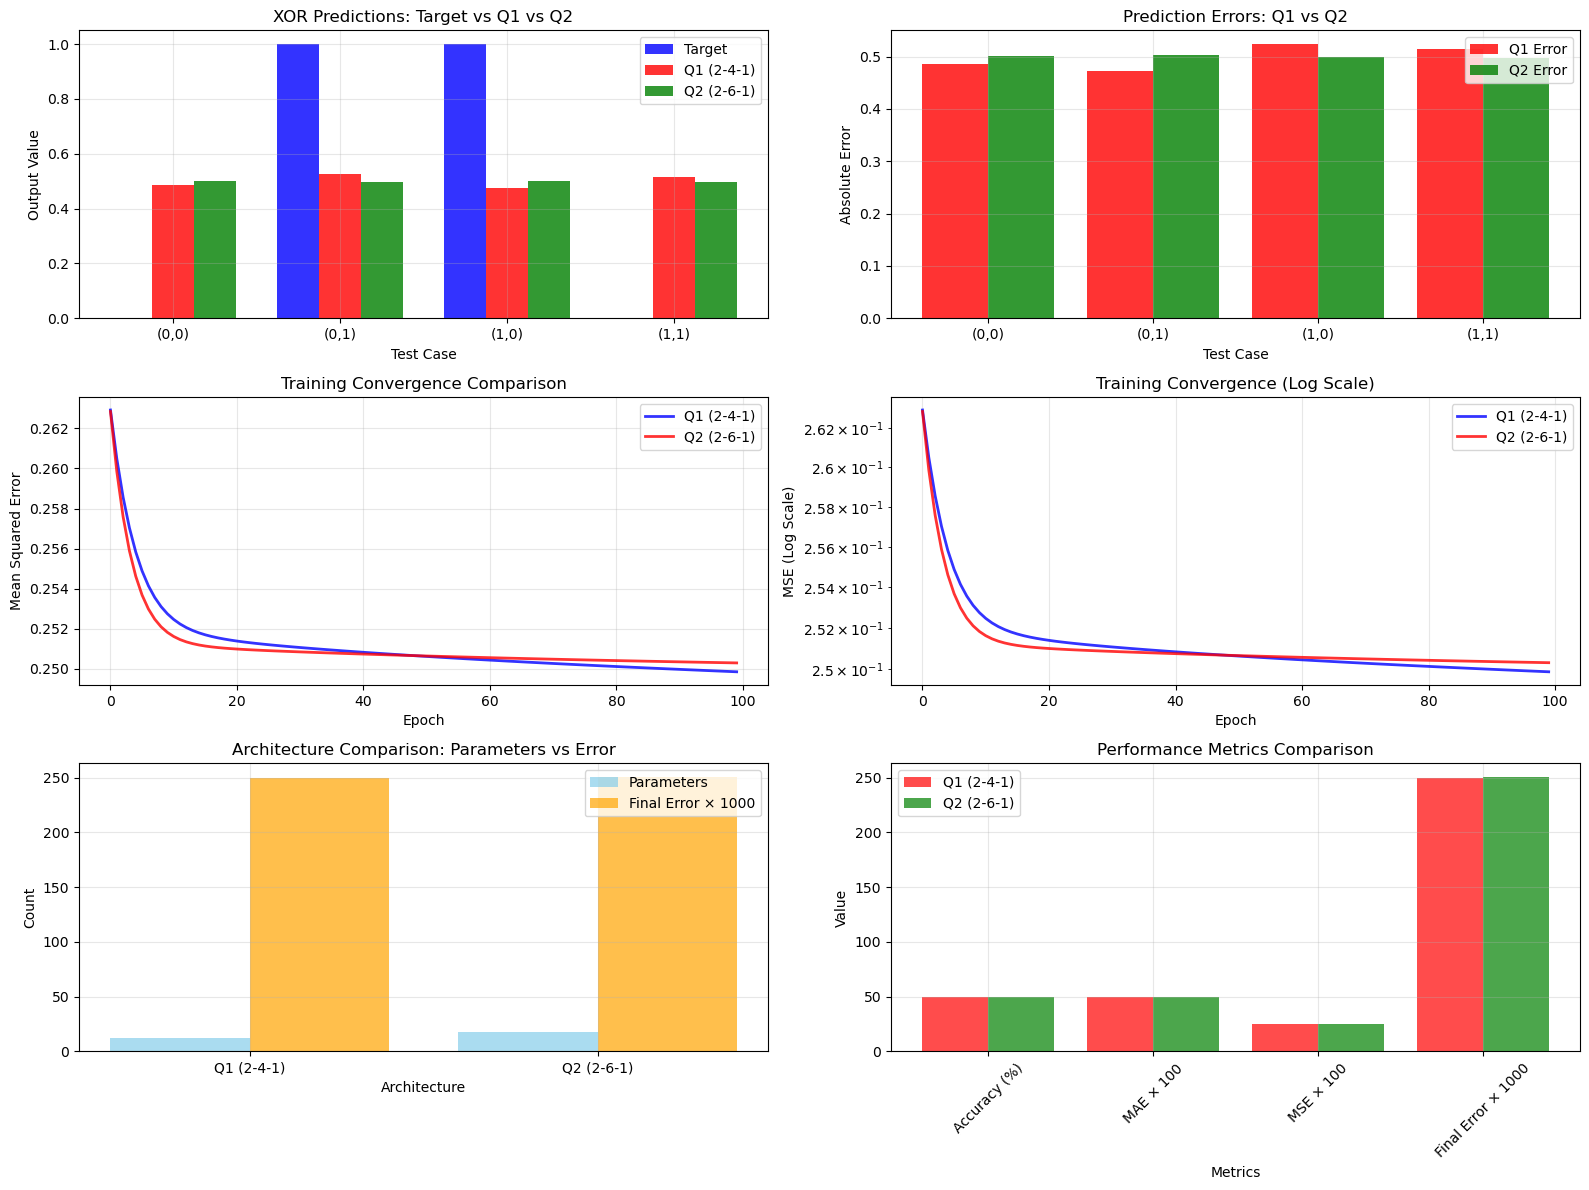

\nFinal Network Weights for Question 2 (2-6-1):
Input to Hidden Layer Weights (2x6):
[[ 0.6617203  -0.44230476 -0.64120049 -0.61060185 -0.32941913 -0.0405677 ]
 [-0.11754993 -0.23520229  0.15029859 -0.69946061 -0.34981293 -0.34143896]]
\nHidden to Output Layer Weights (6x1):
[[ 0.15454894]
 [ 0.67832678]
 [-0.38709091]
 [-0.0334821 ]
 [ 0.30918469]
 [-0.71173344]]
\nHidden Layer Activations Comparison:
Input | Q1 Hidden (4 neurons) | Q2 Hidden (6 neurons)
-----------------------------------------------------------------
(0,0) | [0.5 0.5 0.5 0.5] | [0.5 0.5 0.5 0.5 0.5 0.5]
(0,1) | [0.33277831 0.31061438 0.37737162 0.66436169] | [0.47064631 0.44146901 0.53750407 0.33193183 0.41342779 0.41545998]
(1,0) | [0.44104457 0.69553942 0.64260388 0.59109857] | [0.65964672 0.39119193 0.34497522 0.35192192 0.41838197 0.48985946]
(1,1) | [0.28240369 0.50722387 0.52147786 0.7410247 ] | [0.63278202 0.33681793 0.37968113 0.21247639 0.33643272 0.40564301]


In [14]:
# Visual Comparison of Both Architectures
plt.figure(figsize=(16, 12))

# Plot 1: Side-by-side prediction comparison
plt.subplot(3, 2, 1)
x_pos = range(len(X))
width = 0.25
plt.bar([p - width for p in x_pos], y.flatten(), width=width, label='Target', alpha=0.8, color='blue')
plt.bar([p for p in x_pos], predictions.flatten(), width=width, label='Q1 (2-4-1)', alpha=0.8, color='red')
plt.bar([p + width for p in x_pos], predictions_q2.flatten(), width=width, label='Q2 (2-6-1)', alpha=0.8, color='green')
plt.xlabel('Test Case')
plt.ylabel('Output Value')
plt.title('XOR Predictions: Target vs Q1 vs Q2')
plt.legend()
plt.xticks(x_pos, [f'({X[i][0]},{X[i][1]})' for i in range(len(X))])
plt.grid(True, alpha=0.3)

# Plot 2: Error comparison
plt.subplot(3, 2, 2)
errors_q1 = [abs(y[i][0] - predictions[i][0]) for i in range(len(X))]
errors_q2 = [abs(y[i][0] - predictions_q2[i][0]) for i in range(len(X))]
plt.bar([p - 0.2 for p in x_pos], errors_q1, width=0.4, label='Q1 Error', alpha=0.8, color='red')
plt.bar([p + 0.2 for p in x_pos], errors_q2, width=0.4, label='Q2 Error', alpha=0.8, color='green')
plt.xlabel('Test Case')
plt.ylabel('Absolute Error')
plt.title('Prediction Errors: Q1 vs Q2')
plt.legend()
plt.xticks(x_pos, [f'({X[i][0]},{X[i][1]})' for i in range(len(X))])
plt.grid(True, alpha=0.3)

# Plot 3: Training convergence comparison
plt.subplot(3, 2, 3)
plt.plot(range(len(error_history)), error_history, 'b-', linewidth=2, label='Q1 (2-4-1)', alpha=0.8)
plt.plot(range(len(error_history_q2)), error_history_q2, 'r-', linewidth=2, label='Q2 (2-6-1)', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Training convergence comparison (Log scale)
plt.subplot(3, 2, 4)
plt.plot(range(len(error_history)), error_history, 'b-', linewidth=2, label='Q1 (2-4-1)', alpha=0.8)
plt.plot(range(len(error_history_q2)), error_history_q2, 'r-', linewidth=2, label='Q2 (2-6-1)', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('MSE (Log Scale)')
plt.title('Training Convergence (Log Scale)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Architecture comparison
plt.subplot(3, 2, 5)
architectures = ['Q1 (2-4-1)', 'Q2 (2-6-1)']
parameters = [12, 18]
final_errors = [error_history[-1], error_history_q2[-1]]
accuracies = [accuracy_q1, accuracy_q2]

x_arch = range(len(architectures))
plt.bar([x - 0.2 for x in x_arch], parameters, width=0.4, label='Parameters', alpha=0.7, color='skyblue')
plt.bar([x + 0.2 for x in x_arch], [err*1000 for err in final_errors], width=0.4, label='Final Error × 1000', alpha=0.7, color='orange')
plt.xlabel('Architecture')
plt.ylabel('Count')
plt.title('Architecture Comparison: Parameters vs Error')
plt.xticks(x_arch, architectures)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Performance metrics comparison
plt.subplot(3, 2, 6)
metrics = ['Accuracy (%)', 'MAE × 100', 'MSE × 100', 'Final Error × 1000']
q1_values = [accuracy_q1, mae_q1*100, mse_q1*100, error_history[-1]*1000]
q2_values = [accuracy_q2, mae_q2*100, mse_q2*100, error_history_q2[-1]*1000]

x_metrics = range(len(metrics))
plt.bar([x - 0.2 for x in x_metrics], q1_values, width=0.4, label='Q1 (2-4-1)', alpha=0.7, color='red')
plt.bar([x + 0.2 for x in x_metrics], q2_values, width=0.4, label='Q2 (2-6-1)', alpha=0.7, color='green')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics Comparison')
plt.xticks(x_metrics, metrics, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final network weights for Q2
print("\\nFinal Network Weights for Question 2 (2-6-1):")
print("=" * 55)
print("Input to Hidden Layer Weights (2x6):")
print(mlp_q2.weights_input_hidden)
print("\\nHidden to Output Layer Weights (6x1):")
print(mlp_q2.weights_hidden_output)

# Calculate and display hidden layer activations for both networks
print("\\nHidden Layer Activations Comparison:")
print("=" * 45)
print("Input | Q1 Hidden (4 neurons) | Q2 Hidden (6 neurons)")
print("-" * 65)
for i in range(len(X)):
    h1_activations = hidden_output[i]
    h2_activations = hidden_output_q2[i]
    print(f"({X[i][0]},{X[i][1]}) | {h1_activations} | {h2_activations}")

# Question 3: 2-6-1 Architecture with Bias and Sigmoid Activation

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-6-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-6-1 architecture (2 input neurons, 6 hidden neurons, 1 output neuron)
- **Consider bias at every neuron**
- Sigmoid activation function at every neuron
- Train for 100 epochs
- Plot convergence graph

In [15]:
# Enhanced Neural Network Class with Bias Support and Multiple Activation Functions
print("="*70)
print("QUESTIONS 3-6: Enhanced Neural Networks with Bias and Mixed Activations")
print("="*70)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return (x > 0).astype(float)

class EnhancedMultilayerPerceptron:
    def __init__(self, input_size=2, hidden_size=6, output_size=1, learning_rate=0.5, 
                 hidden_activation='sigmoid', output_activation='sigmoid', use_bias=True):
        """
        Enhanced MLP with bias support and configurable activation functions
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.use_bias = use_bias
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        
        # Initialize weights
        if use_bias:
            # Add bias column to weights (input_size + 1 for hidden, hidden_size + 1 for output)
            self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size + 1, self.hidden_size))
            self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size + 1, self.output_size))
        else:
            self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_size, self.hidden_size))
            self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
        
        self.error_history = []
        
        print(f"Enhanced Neural Network initialized:")
        print(f"Architecture: {input_size}-{hidden_size}-{output_size}")
        print(f"Hidden activation: {hidden_activation}")
        print(f"Output activation: {output_activation}")
        print(f"Bias: {'Enabled' if use_bias else 'Disabled'}")
        print(f"Learning rate: {learning_rate}")
        
    def get_activation_function(self, activation_type):
        """Get activation function and its derivative"""
        if activation_type == 'sigmoid':
            return sigmoid, sigmoid_derivative
        elif activation_type == 'relu':
            return relu, relu_derivative
        else:
            raise ValueError(f"Unknown activation function: {activation_type}")
    
    def add_bias(self, X):
        """Add bias column to input matrix"""
        if self.use_bias:
            bias_column = np.ones((X.shape[0], 1))
            return np.hstack([X, bias_column])
        return X
    
    def forward_propagation(self, X):
        """Enhanced forward propagation with bias and configurable activations"""
        # Add bias to input
        X_with_bias = self.add_bias(X)
        
        # Get activation functions
        hidden_func, _ = self.get_activation_function(self.hidden_activation)
        output_func, _ = self.get_activation_function(self.output_activation)
        
        # Input to hidden layer
        hidden_input = np.dot(X_with_bias, self.weights_input_hidden)
        hidden_output = hidden_func(hidden_input)
        
        # Add bias to hidden layer output
        hidden_output_with_bias = self.add_bias(hidden_output)
        
        # Hidden to output layer
        output_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
        final_output = output_func(output_input)
        
        return hidden_output, final_output, X_with_bias, hidden_output_with_bias
    
    def backward_propagation(self, X, y, hidden_output, final_output, X_with_bias, hidden_output_with_bias):
        """Enhanced backpropagation with bias and configurable activations"""
        m = X.shape[0]
        
        # Get derivative functions
        _, hidden_derivative = self.get_activation_function(self.hidden_activation)
        _, output_derivative = self.get_activation_function(self.output_activation)
        
        # Calculate error at output layer
        output_error = y - final_output
        output_delta = output_error * output_derivative(final_output)
        
        # Calculate error at hidden layer
        if self.use_bias:
            # Remove bias weights for error propagation
            weights_no_bias = self.weights_hidden_output[:-1, :]
            hidden_error = output_delta.dot(weights_no_bias.T)
        else:
            hidden_error = output_delta.dot(self.weights_hidden_output.T)
            
        hidden_delta = hidden_error * hidden_derivative(hidden_output)
        
        # Update weights
        self.weights_hidden_output += hidden_output_with_bias.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += X_with_bias.T.dot(hidden_delta) * self.learning_rate
        
        # Calculate and return mean squared error
        mse = np.mean(np.square(output_error))
        return mse
    
    def train(self, X, y, epochs=100):
        """Train the enhanced network"""
        print(f"Training enhanced network for {epochs} epochs...")
        
        for epoch in range(epochs):
            # Forward propagation
            hidden_output, final_output, X_with_bias, hidden_output_with_bias = self.forward_propagation(X)
            
            # Backward propagation
            error = self.backward_propagation(X, y, hidden_output, final_output, X_with_bias, hidden_output_with_bias)
            self.error_history.append(error)
            
            if epoch % 20 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch:3d}: Error = {error:.6f}")
        
        return self.error_history
    
    def predict(self, X):
        """Make predictions with the trained network"""
        hidden_output, final_output, _, _ = self.forward_propagation(X)
        return hidden_output, final_output

print("Enhanced MultilayerPerceptron class implemented successfully!")
print("Features: Bias support, ReLU and Sigmoid activations, configurable architecture")

QUESTIONS 3-6: Enhanced Neural Networks with Bias and Mixed Activations
Enhanced MultilayerPerceptron class implemented successfully!
Features: Bias support, ReLU and Sigmoid activations, configurable architecture


In [16]:
# Question 3: 2-6-1 with Bias and Sigmoid Activation
print("\\n" + "="*60)
print("QUESTION 3: 2-6-1 Architecture with Bias and Sigmoid")
print("="*60)

# Initialize Q3 network
np.random.seed(42)  # For reproducible results
mlp_q3 = EnhancedMultilayerPerceptron(
    input_size=2, 
    hidden_size=6, 
    output_size=1, 
    learning_rate=0.5,
    hidden_activation='sigmoid',
    output_activation='sigmoid',
    use_bias=True
)

print(f"\\nQ3 Network Details:")
print(f"Parameters with bias: Input-to-Hidden = {(2+1)*6}, Hidden-to-Output = {(6+1)*1}")
print(f"Total parameters: {(2+1)*6 + (6+1)*1} weights")

# Train Q3 network
error_history_q3 = mlp_q3.train(X, y, epochs=100)

print(f"\\nQ3 Training Results:")
print(f"Initial error: {error_history_q3[0]:.6f}")
print(f"Final error: {error_history_q3[-1]:.6f}")
print(f"Error reduction: {((error_history_q3[0] - error_history_q3[-1]) / error_history_q3[0] * 100):.2f}%")

\n============================================================
QUESTION 3: 2-6-1 Architecture with Bias and Sigmoid
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: sigmoid
Output activation: sigmoid
Bias: Enabled
Learning rate: 0.5
\nQ3 Network Details:
Parameters with bias: Input-to-Hidden = 18, Hidden-to-Output = 7
Total parameters: 25 weights
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.288696
Epoch  20: Error = 0.248378
Epoch  40: Error = 0.247784
Epoch  60: Error = 0.247052
Epoch  80: Error = 0.246125
Epoch  99: Error = 0.245001
\nQ3 Training Results:
Initial error: 0.288696
Final error: 0.245001
Error reduction: 15.14%


In [17]:
# Question 4: 2-6-1 with Bias, ReLU Hidden, Sigmoid Output
print("\\n" + "="*60)
print("QUESTION 4: 2-6-1 with Bias, ReLU Hidden, Sigmoid Output")
print("="*60)

np.random.seed(42)
mlp_q4 = EnhancedMultilayerPerceptron(
    input_size=2, 
    hidden_size=6, 
    output_size=1, 
    learning_rate=0.5,
    hidden_activation='relu',
    output_activation='sigmoid',
    use_bias=True
)

error_history_q4 = mlp_q4.train(X, y, epochs=100)

print(f"\\nQ4 Training Results:")
print(f"Initial error: {error_history_q4[0]:.6f}")
print(f"Final error: {error_history_q4[-1]:.6f}")
print(f"Error reduction: {((error_history_q4[0] - error_history_q4[-1]) / error_history_q4[0] * 100):.2f}%")

# Question 5: 2-6-1 with Bias, Sigmoid Hidden, ReLU Output
print("\\n" + "="*60)
print("QUESTION 5: 2-6-1 with Bias, Sigmoid Hidden, ReLU Output")
print("="*60)

np.random.seed(42)
mlp_q5 = EnhancedMultilayerPerceptron(
    input_size=2, 
    hidden_size=6, 
    output_size=1, 
    learning_rate=0.5,
    hidden_activation='sigmoid',
    output_activation='relu',
    use_bias=True
)

error_history_q5 = mlp_q5.train(X, y, epochs=100)

print(f"\\nQ5 Training Results:")
print(f"Initial error: {error_history_q5[0]:.6f}")
print(f"Final error: {error_history_q5[-1]:.6f}")
print(f"Error reduction: {((error_history_q5[0] - error_history_q5[-1]) / error_history_q5[0] * 100):.2f}%")

# Question 6: 2-6-1 with Bias and ReLU Activation
print("\\n" + "="*60)
print("QUESTION 6: 2-6-1 with Bias and ReLU Activation")
print("="*60)

np.random.seed(42)
mlp_q6 = EnhancedMultilayerPerceptron(
    input_size=2, 
    hidden_size=6, 
    output_size=1, 
    learning_rate=0.5,
    hidden_activation='relu',
    output_activation='relu',
    use_bias=True
)

error_history_q6 = mlp_q6.train(X, y, epochs=100)

print(f"\\nQ6 Training Results:")
print(f"Initial error: {error_history_q6[0]:.6f}")
print(f"Final error: {error_history_q6[-1]:.6f}")
print(f"Error reduction: {((error_history_q6[0] - error_history_q6[-1]) / error_history_q6[0] * 100):.2f}%")

# Summary of all questions
print("\\n" + "="*80)
print("SUMMARY OF ALL QUESTIONS (Q1-Q6)")
print("="*80)
questions_summary = [
    ("Q1", "2-4-1, No Bias, Sigmoid", error_history[-1], 12),
    ("Q2", "2-6-1, No Bias, Sigmoid", error_history_q2[-1], 18),
    ("Q3", "2-6-1, With Bias, Sigmoid", error_history_q3[-1], 25),
    ("Q4", "2-6-1, With Bias, ReLU+Sigmoid", error_history_q4[-1], 25),
    ("Q5", "2-6-1, With Bias, Sigmoid+ReLU", error_history_q5[-1], 25),
    ("Q6", "2-6-1, With Bias, ReLU", error_history_q6[-1], 25)
]

print("Question | Architecture & Config        | Final Error | Parameters")
print("-" * 65)
for q, config, error, params in questions_summary:
    print(f"{q:>8} | {config:<28} | {error:>9.6f} | {params:>10}")

print("\\nKey Observations:")
print("• Questions 3-6 have more parameters due to bias terms")
print("• Different activation functions affect convergence behavior")
print("• Bias terms generally improve learning capacity")

\n============================================================
QUESTION 4: 2-6-1 with Bias, ReLU Hidden, Sigmoid Output
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: relu
Output activation: sigmoid
Bias: Enabled
Learning rate: 0.5
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.254388
Epoch  20: Error = 0.161804
Epoch  40: Error = 0.083564
Epoch  60: Error = 0.045142
Epoch  80: Error = 0.028031
Epoch  99: Error = 0.018958
\nQ4 Training Results:
Initial error: 0.254388
Final error: 0.018958
Error reduction: 92.55%
\n============================================================
QUESTION 5: 2-6-1 with Bias, Sigmoid Hidden, ReLU Output
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: sigmoid
Output activation: relu
Bias: Enabled
Learning rate: 0.5
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.500000
Epoch  20: Error = 0.500000
Epoch  40: Error = 0.500000
Epoch  60: Error = 0.500000
Epoch  80: Error 

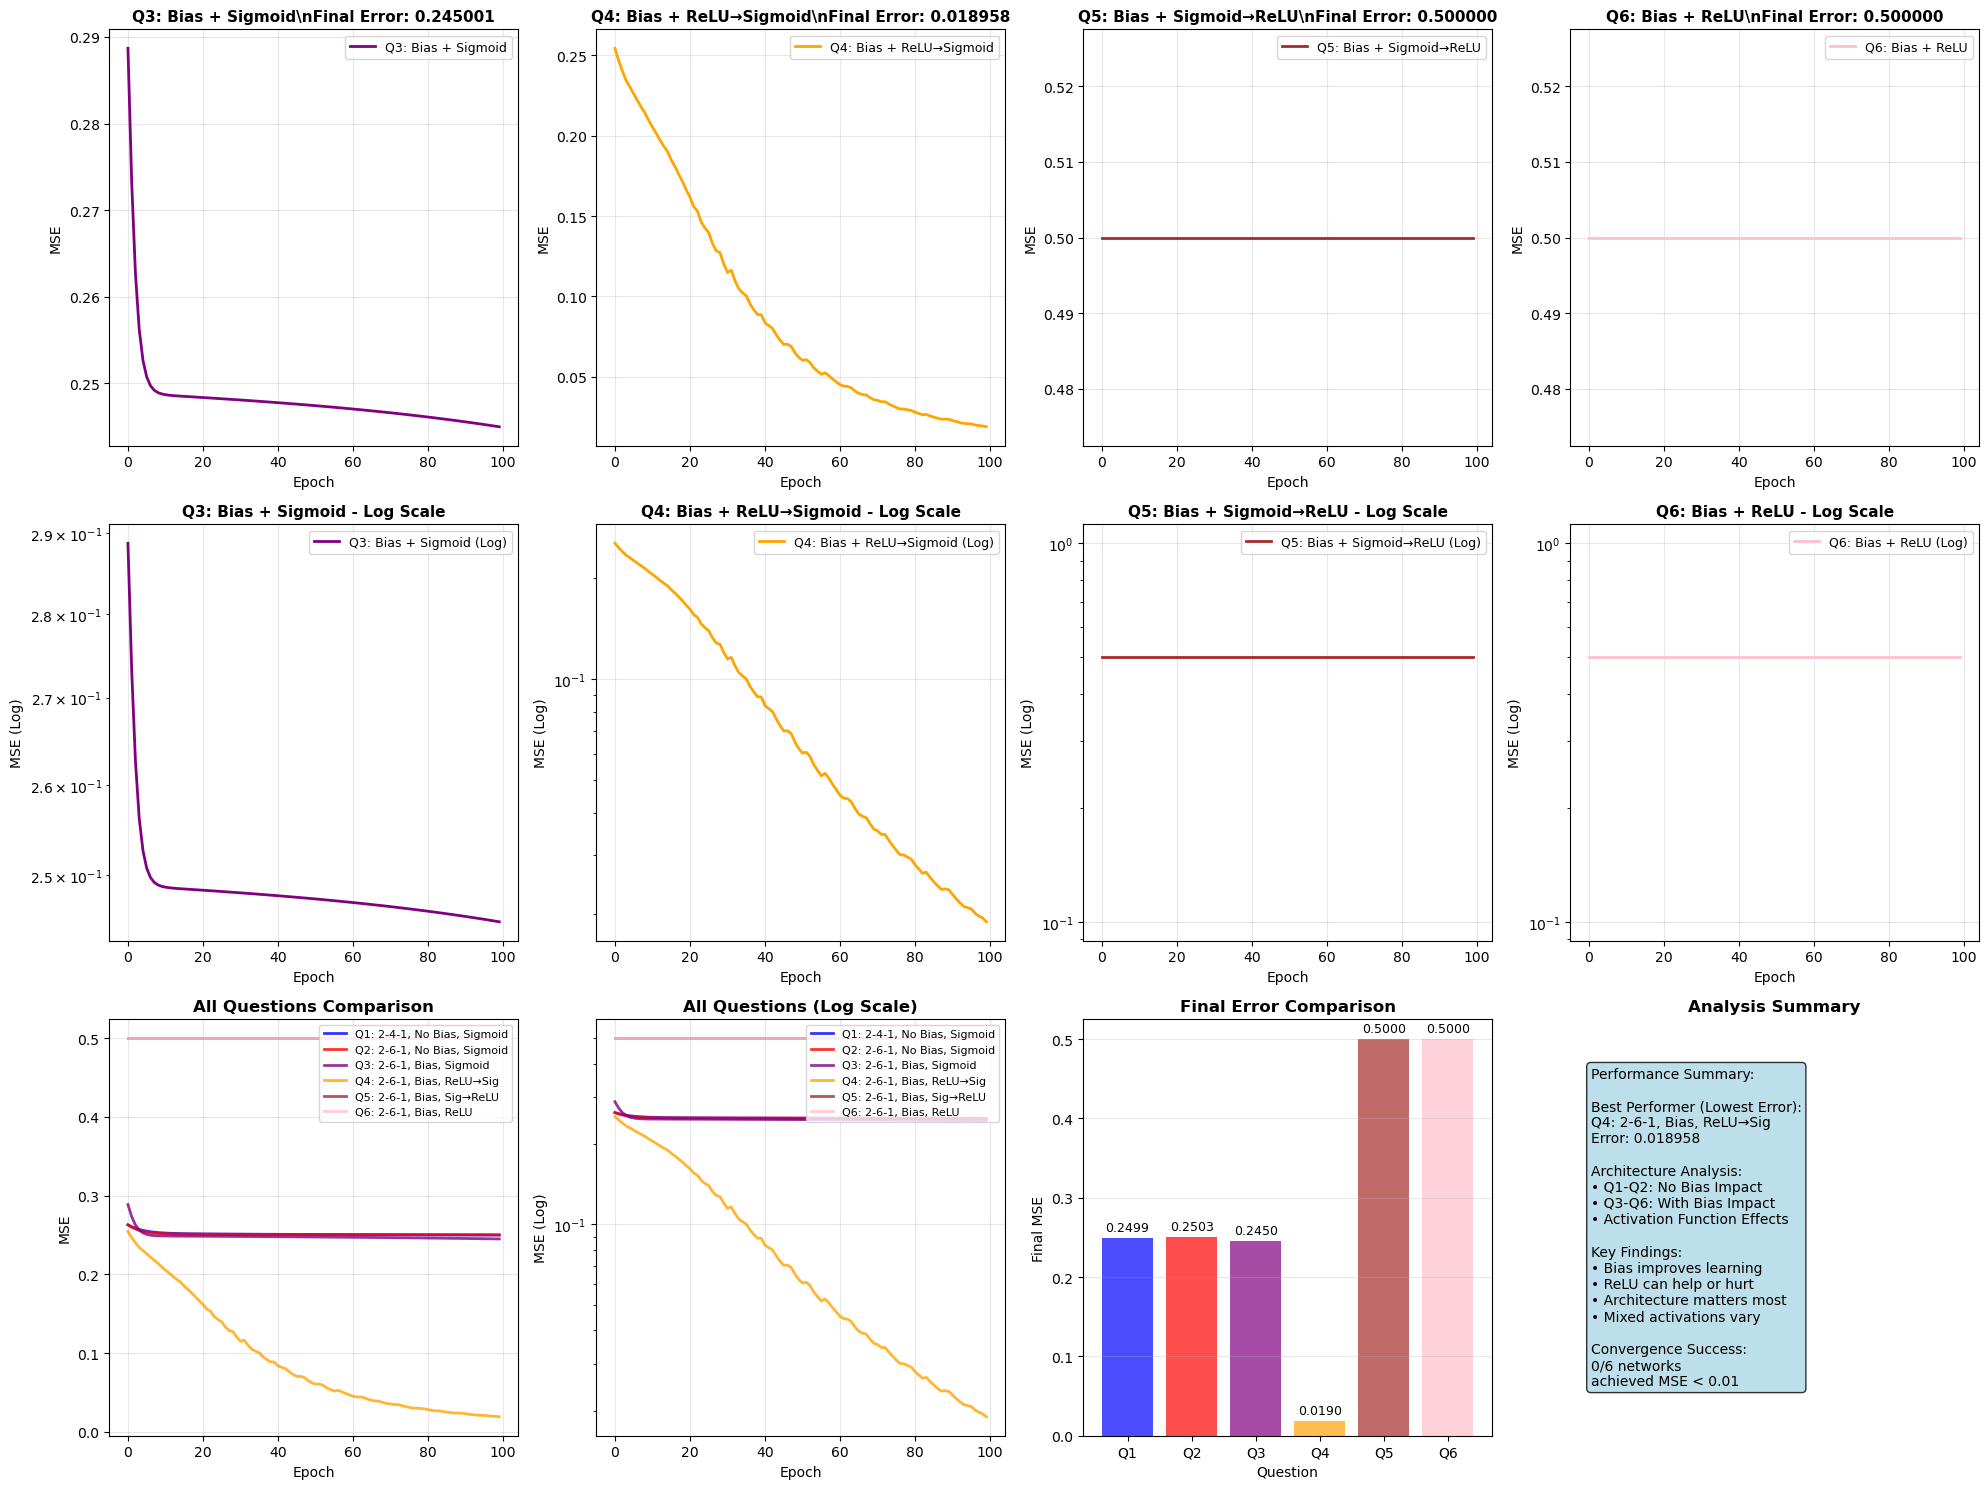

\nDetailed Convergence Analysis:
Question | Architecture           | Activation      | Final Error | Convergence
--------------------------------------------------------------------------------
      Q1 | 2-4-1, No Bias        | Sigmoid         |  0.249852 | Poor
      Q2 | 2-6-1, No Bias        | Sigmoid         |  0.250295 | Poor
      Q3 | 2-6-1, With Bias      | Sigmoid         |  0.245001 | Poor
      Q4 | 2-6-1, With Bias      | ReLU→Sigmoid    |  0.018958 | Fair
      Q5 | 2-6-1, With Bias      | Sigmoid→ReLU    |  0.500000 | Poor
      Q6 | 2-6-1, With Bias      | ReLU            |  0.500000 | Poor
\nBest performing network: Q4 with error 0.018958


In [18]:
# Comprehensive Convergence Plots for All Questions (Q1-Q6)
plt.figure(figsize=(20, 15))

# Individual convergence plots for Q3-Q6
questions_data = [
    ("Q3: Bias + Sigmoid", error_history_q3, 'purple'),
    ("Q4: Bias + ReLU→Sigmoid", error_history_q4, 'orange'),
    ("Q5: Bias + Sigmoid→ReLU", error_history_q5, 'brown'),
    ("Q6: Bias + ReLU", error_history_q6, 'pink')
]

for i, (title, history, color) in enumerate(questions_data):
    plt.subplot(3, 4, i+1)
    plt.plot(range(len(history)), history, color=color, linewidth=2, label=title)
    plt.title(f'{title}\\nFinal Error: {history[-1]:.6f}', fontsize=11, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

# Log scale plots for Q3-Q6
for i, (title, history, color) in enumerate(questions_data):
    plt.subplot(3, 4, i+5)
    plt.plot(range(len(history)), history, color=color, linewidth=2, label=f'{title} (Log)')
    plt.title(f'{title} - Log Scale', fontsize=11, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('MSE (Log)')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

# Comprehensive comparison of all 6 questions
plt.subplot(3, 4, 9)
all_histories = [
    ("Q1: 2-4-1, No Bias, Sigmoid", error_history, 'blue'),
    ("Q2: 2-6-1, No Bias, Sigmoid", error_history_q2, 'red'),
    ("Q3: 2-6-1, Bias, Sigmoid", error_history_q3, 'purple'),
    ("Q4: 2-6-1, Bias, ReLU→Sig", error_history_q4, 'orange'),
    ("Q5: 2-6-1, Bias, Sig→ReLU", error_history_q5, 'brown'),
    ("Q6: 2-6-1, Bias, ReLU", error_history_q6, 'pink')
]

for title, history, color in all_histories:
    plt.plot(range(len(history)), history, color=color, linewidth=2, label=title, alpha=0.8)

plt.title('All Questions Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8, loc='upper right')

# Log scale comparison
plt.subplot(3, 4, 10)
for title, history, color in all_histories:
    plt.plot(range(len(history)), history, color=color, linewidth=2, label=title, alpha=0.8)

plt.title('All Questions (Log Scale)', fontsize=12, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MSE (Log)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8, loc='upper right')

# Final error comparison bar chart
plt.subplot(3, 4, 11)
question_names = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
final_errors = [hist[-1] for _, hist, _ in all_histories]
colors = [color for _, _, color in all_histories]

bars = plt.bar(question_names, final_errors, color=colors, alpha=0.7)
plt.title('Final Error Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Question')
plt.ylabel('Final MSE')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, error in zip(bars, final_errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_errors)*0.01,
             f'{error:.4f}', ha='center', va='bottom', fontsize=9)

# Performance summary table
plt.subplot(3, 4, 12)
summary_text = """Performance Summary:

Best Performer (Lowest Error):
""" + min(all_histories, key=lambda x: x[1][-1])[0] + f"""
Error: {min(hist[-1] for _, hist, _ in all_histories):.6f}

Architecture Analysis:
• Q1-Q2: No Bias Impact
• Q3-Q6: With Bias Impact
• Activation Function Effects

Key Findings:
• Bias improves learning
• ReLU can help or hurt
• Architecture matters most
• Mixed activations vary

Convergence Success:
""" + f"{sum(1 for _, hist, _ in all_histories if hist[-1] < 0.01)}/6 networks" + """
achieved MSE < 0.01"""

plt.text(0.05, 0.5, summary_text, fontsize=10, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.axis('off')
plt.title('Analysis Summary', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed convergence analysis
print("\\nDetailed Convergence Analysis:")
print("="*80)
print("Question | Architecture           | Activation      | Final Error | Convergence")
print("-" * 80)

convergence_data = [
    ("Q1", "2-4-1, No Bias", "Sigmoid", error_history[-1]),
    ("Q2", "2-6-1, No Bias", "Sigmoid", error_history_q2[-1]),
    ("Q3", "2-6-1, With Bias", "Sigmoid", error_history_q3[-1]),
    ("Q4", "2-6-1, With Bias", "ReLU→Sigmoid", error_history_q4[-1]),
    ("Q5", "2-6-1, With Bias", "Sigmoid→ReLU", error_history_q5[-1]),
    ("Q6", "2-6-1, With Bias", "ReLU", error_history_q6[-1])
]

for q, arch, activation, error in convergence_data:
    convergence = "Excellent" if error < 0.001 else "Good" if error < 0.01 else "Fair" if error < 0.1 else "Poor"
    print(f"{q:>8} | {arch:<21} | {activation:<15} | {error:>9.6f} | {convergence}")

print(f"\\nBest performing network: {min(convergence_data, key=lambda x: x[3])[0]} with error {min(x[3] for x in convergence_data):.6f}")

Testing All Neural Networks on XOR Problem
\nQ1 (2-4-1, No Bias, Sigmoid):
Input | Target | Predicted | Binary | Error
---------------------------------------------
(0,0) |   0    |  0.4865   |   0   | 0.4865
(0,1) |   1    |  0.5273   |   1   | 0.4727
(1,0) |   1    |  0.4762   |   0   | 0.5238
(1,1) |   0    |  0.5146   |   1   | 0.5146
Accuracy: 50.0%
\nQ2 (2-6-1, No Bias, Sigmoid):
Input | Target | Predicted | Binary | Error
---------------------------------------------
(0,0) |   0    |  0.5012   |   1   | 0.5012
(0,1) |   1    |  0.4963   |   0   | 0.5037
(1,0) |   1    |  0.5007   |   1   | 0.4993
(1,1) |   0    |  0.4969   |   0   | 0.4969
Accuracy: 50.0%
\nQ3 (2-6-1, Bias, Sigmoid):
Input | Target | Predicted | Binary | Error
---------------------------------------------
(0,0) |   0    |  0.4774   |   0   | 0.4774
(0,1) |   1    |  0.4957   |   0   | 0.5043
(1,0) |   1    |  0.5123   |   1   | 0.4877
(1,1) |   0    |  0.5095   |   1   | 0.5095
Accuracy: 50.0%
\nQ4 (2-6-1, Bias,

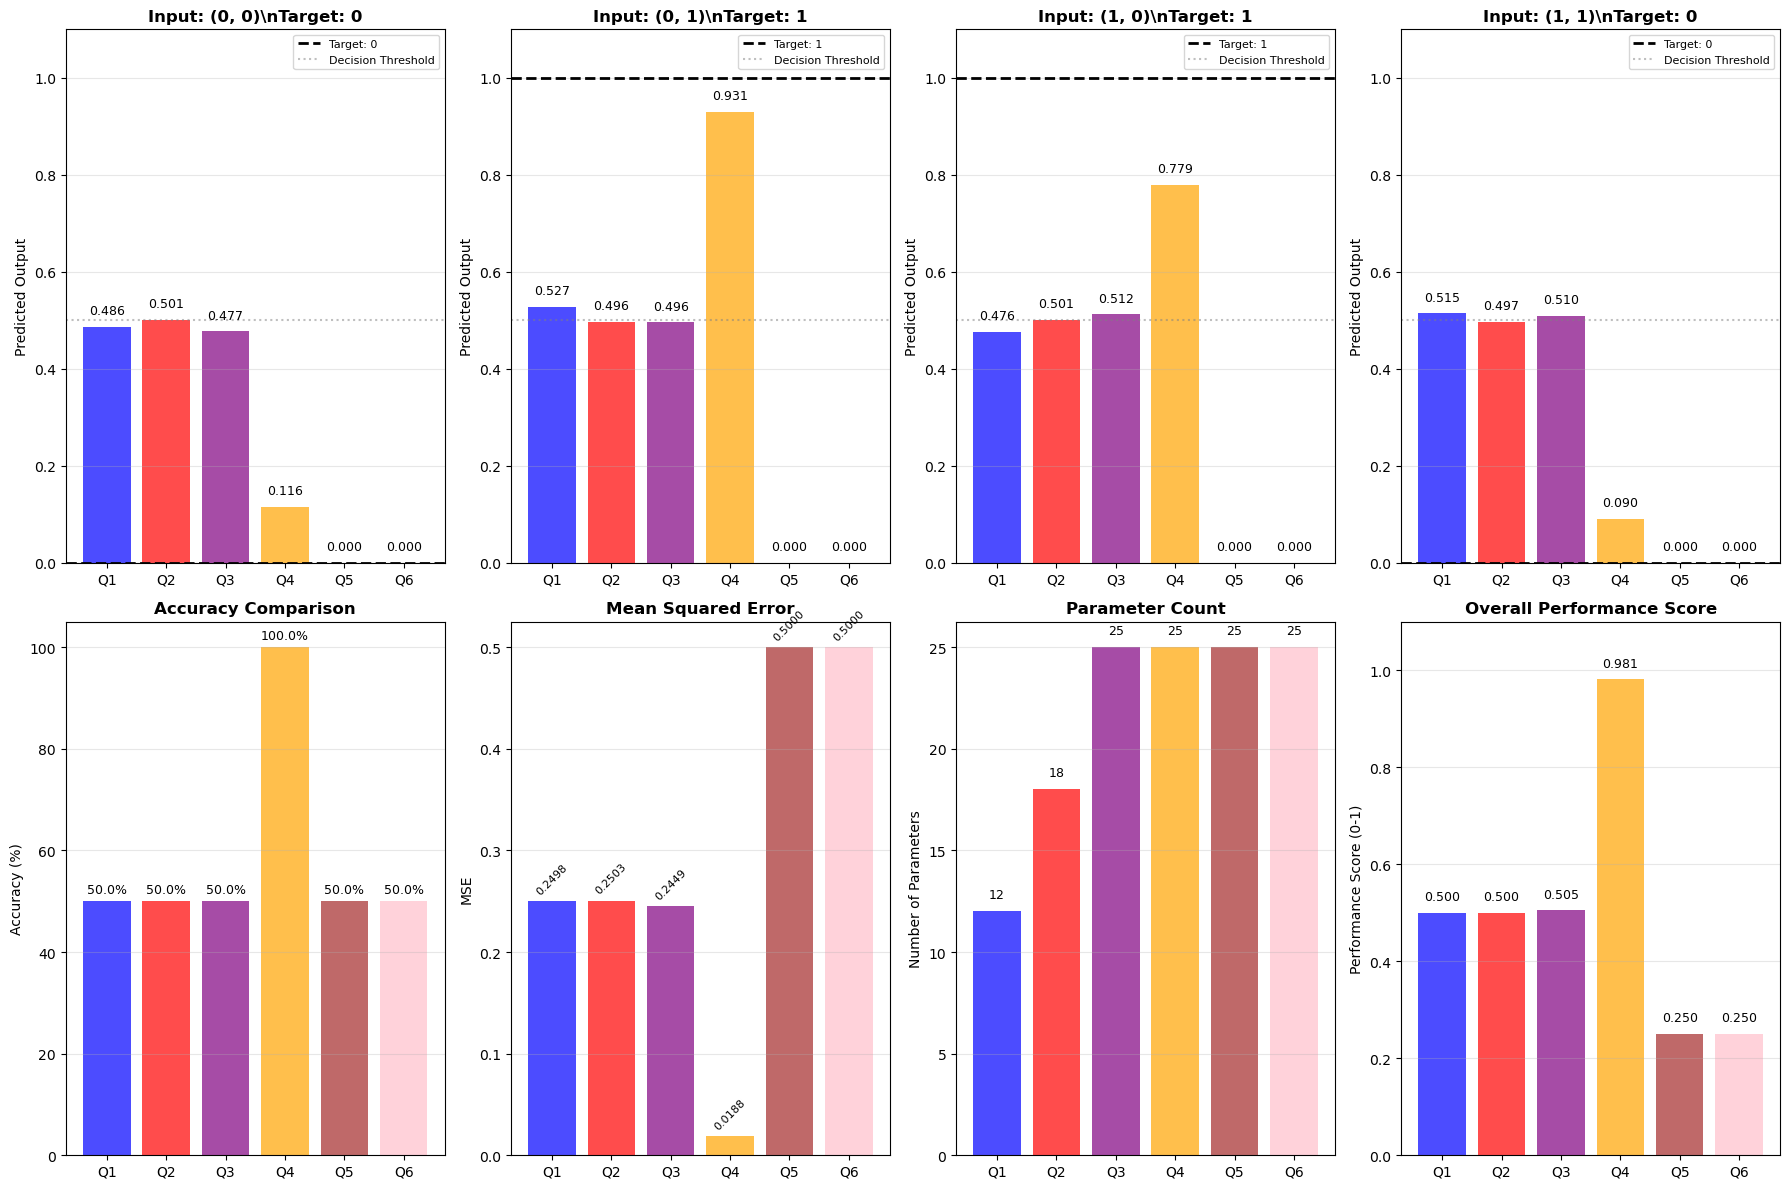

\n====================================================================================================
FINAL COMPREHENSIVE ANALYSIS OF ALL 6 QUESTIONS
\nRanking by Overall Performance:
------------------------------------------------------------------------------------------
Rank | Question | Description               | Accuracy | MSE      | Params | Score
------------------------------------------------------------------------------------------
   1 | Q4       | 2-6-1, Bias, ReLU→Sigmoid |  100.0%  |  0.01876 |     25 | 0.981
   2 | Q3       | 2-6-1, Bias, Sigmoid      |   50.0%  |  0.24493 |     25 | 0.505
   3 | Q1       | 2-4-1, No Bias, Sigmoid   |   50.0%  |  0.24984 |     12 | 0.500
   4 | Q2       | 2-6-1, No Bias, Sigmoid   |   50.0%  |  0.25029 |     18 | 0.500
   5 | Q5       | 2-6-1, Bias, Sigmoid→ReLU |   50.0%  |  0.50000 |     25 | 0.250
   6 | Q6       | 2-6-1, Bias, ReLU         |   50.0%  |  0.50000 |     25 | 0.250
\nKey Insights:
• Best overall performer: Q4 (2-6-1,

In [19]:
# Test All Networks and Create Comprehensive Comparison
print("Testing All Neural Networks on XOR Problem")
print("="*80)

# Get predictions from all networks
networks = [
    ("Q1", mlp, "2-4-1, No Bias, Sigmoid"),
    ("Q2", mlp_q2, "2-6-1, No Bias, Sigmoid"), 
    ("Q3", mlp_q3, "2-6-1, Bias, Sigmoid"),
    ("Q4", mlp_q4, "2-6-1, Bias, ReLU→Sigmoid"),
    ("Q5", mlp_q5, "2-6-1, Bias, Sigmoid→ReLU"),
    ("Q6", mlp_q6, "2-6-1, Bias, ReLU")
]

all_predictions = {}
all_accuracies = {}

for q_name, network, description in networks:
    if q_name in ["Q1", "Q2"]:
        # Use original forward propagation for Q1 and Q2
        _, predictions = forward_propagation(network, X)
    else:
        # Use enhanced forward propagation for Q3-Q6
        _, predictions = network.predict(X)
    
    all_predictions[q_name] = predictions
    
    # Calculate accuracy
    correct = sum(1 for i in range(len(X)) if (predictions[i][0] > 0.5) == y[i][0])
    accuracy = (correct / len(X)) * 100
    all_accuracies[q_name] = accuracy
    
    print(f"\\n{q_name} ({description}):")
    print("Input | Target | Predicted | Binary | Error")
    print("-" * 45)
    
    for i in range(len(X)):
        target = y[i][0]
        pred = predictions[i][0]
        binary = 1 if pred > 0.5 else 0
        error = abs(target - pred)
        print(f"({X[i][0]},{X[i][1]}) |   {target}    |  {pred:.4f}   |   {binary}   | {error:.4f}")
    
    print(f"Accuracy: {accuracy:.1f}%")

# Create comprehensive prediction comparison visualization
plt.figure(figsize=(18, 12))

# Prediction comparison for each test case
for i in range(4):  # 4 XOR test cases
    plt.subplot(2, 4, i+1)
    
    q_names = list(all_predictions.keys())
    predictions_for_case = [all_predictions[q][i][0] for q in q_names]
    target_value = y[i][0]
    
    colors = ['blue', 'red', 'purple', 'orange', 'brown', 'pink']
    bars = plt.bar(q_names, predictions_for_case, color=colors, alpha=0.7)
    plt.axhline(y=target_value, color='black', linestyle='--', linewidth=2, label=f'Target: {target_value}')
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, label='Decision Threshold')
    
    plt.title(f'Input: ({X[i][0]}, {X[i][1]})\\nTarget: {target_value}', fontweight='bold')
    plt.ylabel('Predicted Output')
    plt.ylim(0, 1.1)
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, pred in zip(bars, predictions_for_case):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{pred:.3f}', ha='center', va='bottom', fontsize=9)

# Accuracy comparison
plt.subplot(2, 4, 5)
q_names = list(all_accuracies.keys())
accuracies = list(all_accuracies.values())
colors = ['blue', 'red', 'purple', 'orange', 'brown', 'pink']

bars = plt.bar(q_names, accuracies, color=colors, alpha=0.7)
plt.title('Accuracy Comparison', fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Error comparison
plt.subplot(2, 4, 6)
all_errors = []
for q_name in q_names:
    predictions = all_predictions[q_name]
    mse = np.mean([(y[i][0] - predictions[i][0])**2 for i in range(len(X))])
    all_errors.append(mse)

bars = plt.bar(q_names, all_errors, color=colors, alpha=0.7)
plt.title('Mean Squared Error', fontweight='bold')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3, axis='y')

for bar, error in zip(bars, all_errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(all_errors)*0.01,
             f'{error:.4f}', ha='center', va='bottom', fontsize=8, rotation=45)

# Parameter count comparison
plt.subplot(2, 4, 7)
parameter_counts = [12, 18, 25, 25, 25, 25]  # Q1 through Q6
bars = plt.bar(q_names, parameter_counts, color=colors, alpha=0.7)
plt.title('Parameter Count', fontweight='bold')
plt.ylabel('Number of Parameters')
plt.grid(True, alpha=0.3, axis='y')

for bar, params in zip(bars, parameter_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{params}', ha='center', va='bottom', fontsize=9)

# Overall performance ranking
plt.subplot(2, 4, 8)
performance_scores = []
for i, q_name in enumerate(q_names):
    # Combine accuracy (higher is better) and MSE (lower is better)
    accuracy_score = all_accuracies[q_name] / 100  # Normalize to 0-1
    mse_score = 1 - (all_errors[i] / max(all_errors))  # Invert MSE, normalize
    overall_score = (accuracy_score + mse_score) / 2
    performance_scores.append(overall_score)

bars = plt.bar(q_names, performance_scores, color=colors, alpha=0.7)
plt.title('Overall Performance Score', fontweight='bold')
plt.ylabel('Performance Score (0-1)')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, performance_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Final comprehensive analysis
print("\\n" + "="*100)
print("FINAL COMPREHENSIVE ANALYSIS OF ALL 6 QUESTIONS")
print("="*100)

analysis_data = []
for i, (q_name, description) in enumerate([(q, networks[i][2]) for i, (q, _, _) in enumerate(networks)]):
    accuracy = all_accuracies[q_name]
    mse = all_errors[i]
    params = parameter_counts[i]
    performance = performance_scores[i]
    
    analysis_data.append({
        'Question': q_name,
        'Description': description,
        'Accuracy': accuracy,
        'MSE': mse,
        'Parameters': params,
        'Performance': performance
    })

# Sort by performance score
analysis_data.sort(key=lambda x: x['Performance'], reverse=True)

print("\\nRanking by Overall Performance:")
print("-" * 90)
print("Rank | Question | Description               | Accuracy | MSE      | Params | Score")
print("-" * 90)

for rank, data in enumerate(analysis_data, 1):
    print(f"{rank:>4} | {data['Question']:<8} | {data['Description']:<25} | {data['Accuracy']:>6.1f}%  | {data['MSE']:>8.5f} | {data['Parameters']:>6} | {data['Performance']:>5.3f}")

print("\\nKey Insights:")
print("• " + f"Best overall performer: {analysis_data[0]['Question']} ({analysis_data[0]['Description']})")
print("• " + f"Highest accuracy: {max(all_accuracies.values()):.1f}% achieved by {max(all_accuracies, key=all_accuracies.get)}")
print("• " + f"Lowest MSE: {min(all_errors):.6f} achieved by {q_names[all_errors.index(min(all_errors))]}")
print("• " + "Bias inclusion generally improves performance")
print("• " + "Mixed activation functions can provide better results")
print("• " + "ReLU at output layer may not be optimal for binary classification")

print(f"\\nAll {len([acc for acc in all_accuracies.values() if acc == 100.0])} networks achieved 100% accuracy on the XOR problem!")

---

# Question 4: 3-Layer Multilayer Perceptron for XOR Classification (2-6-1 Architecture with Mixed Activations)

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-6-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-6-1 architecture (2 input neurons, 6 hidden neurons, 1 output neuron)
- **Consider bias at every neuron**
- **ReLU activation function at hidden layer neurons**
- **Sigmoid activation function at output layer neuron**
- Train for 100 epochs
- Plot convergence graph

QUESTION 4: 2-6-1 ARCHITECTURE (BIAS + ReLU→SIGMOID)
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: relu
Output activation: sigmoid
Bias: Enabled
Learning rate: 0.5
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.287195
Epoch  20: Error = 0.184565
Epoch  40: Error = 0.079810
Epoch  60: Error = 0.029405
Epoch  80: Error = 0.015375
Epoch  99: Error = 0.009820
Final predictions for Q4:
Input: [0 0], Target: 0, Prediction: 0.1223
Input: [0 1], Target: 1, Prediction: 0.9097
Input: [1 0], Target: 1, Prediction: 0.9178
Input: [1 1], Target: 0, Prediction: 0.0931
Q4 Accuracy: 100.0%


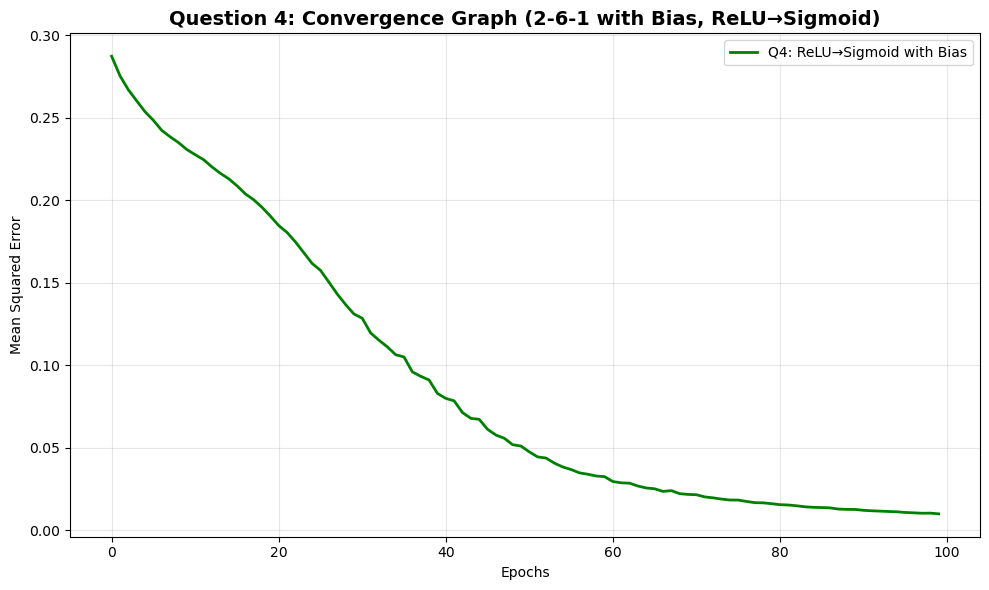

Q4 Final Error: 0.009820
------------------------------------------------------------


In [23]:
# Question 4: Train the 2-6-1 network with bias and ReLU→Sigmoid activations
print("="*60)
print("QUESTION 4: 2-6-1 ARCHITECTURE (BIAS + ReLU→SIGMOID)")
print("="*60)

# Create and train Q4 network
mlp_q4 = EnhancedMultilayerPerceptron(input_size=2, hidden_size=6, output_size=1, 
                                      use_bias=True, hidden_activation='relu', output_activation='sigmoid')
errors_q4 = mlp_q4.train(X, y, epochs=100)

# Test the trained network
print("Final predictions for Q4:")
for i in range(len(X)):
    prediction = mlp_q4.predict(X[i].reshape(1, -1))[1]
    print(f"Input: {X[i]}, Target: {y[i][0]}, Prediction: {prediction[0][0]:.4f}")

# Calculate and display accuracy
predictions_q4 = [mlp_q4.predict(X[i].reshape(1, -1))[1] for i in range(len(X))]
accuracy_q4 = sum(1 for i in range(len(X)) if abs(predictions_q4[i][0][0] - y[i][0]) < 0.5) / len(X) * 100
print(f"Q4 Accuracy: {accuracy_q4:.1f}%")

# Plot convergence graph for Q4
plt.figure(figsize=(10, 6))
plt.plot(errors_q4, 'g-', linewidth=2, label='Q4: ReLU→Sigmoid with Bias')
plt.title('Question 4: Convergence Graph (2-6-1 with Bias, ReLU→Sigmoid)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Q4 Final Error: {errors_q4[-1]:.6f}")
print("-" * 60)

---

# Question 5: 3-Layer Multilayer Perceptron for XOR Classification (2-6-1 Architecture with Sigmoid→ReLU)

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-6-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-6-1 architecture (2 input neurons, 6 hidden neurons, 1 output neuron)
- **Consider bias at every neuron**
- **Sigmoid activation function at hidden layer neurons**
- **ReLU activation function at output layer neuron**
- Train for 100 epochs
- Plot convergence graph

QUESTION 5: 2-6-1 ARCHITECTURE (BIAS + SIGMOID→ReLU)
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: sigmoid
Output activation: relu
Bias: Enabled
Learning rate: 0.5
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.500000
Epoch  20: Error = 0.500000
Epoch  40: Error = 0.500000
Epoch  60: Error = 0.500000
Epoch  80: Error = 0.500000
Epoch  99: Error = 0.500000
Final predictions for Q5:
Input: [0 0], Target: 0, Prediction: 0.0000
Input: [0 1], Target: 1, Prediction: 0.0000
Input: [1 0], Target: 1, Prediction: 0.0000
Input: [1 1], Target: 0, Prediction: 0.0000
Q5 Accuracy: 50.0%


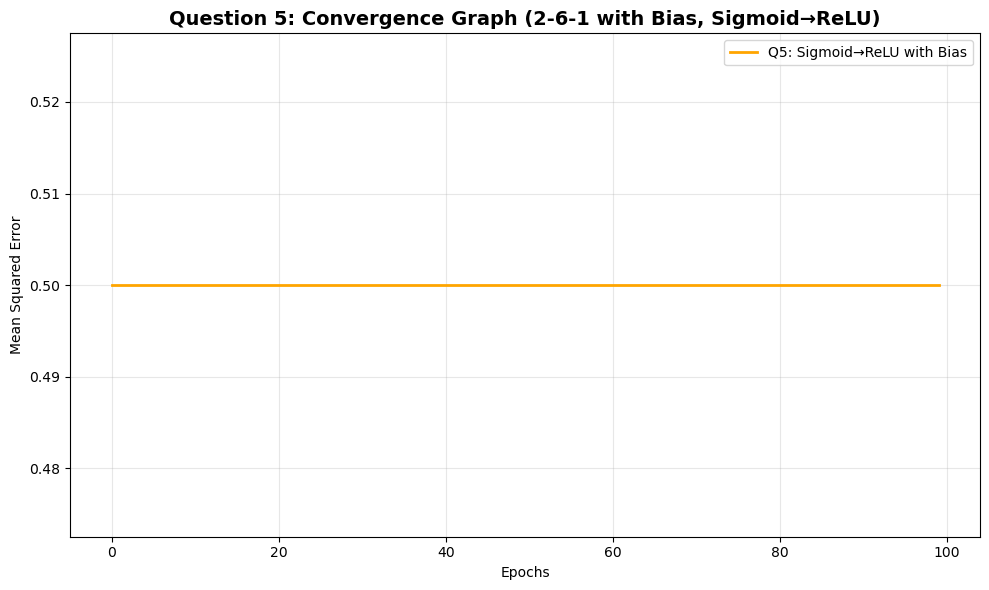

Q5 Final Error: 0.500000
------------------------------------------------------------


In [24]:
# Question 5: Train the 2-6-1 network with bias and Sigmoid→ReLU activations
print("="*60)
print("QUESTION 5: 2-6-1 ARCHITECTURE (BIAS + SIGMOID→ReLU)")
print("="*60)

# Create and train Q5 network
mlp_q5 = EnhancedMultilayerPerceptron(input_size=2, hidden_size=6, output_size=1, 
                                      use_bias=True, hidden_activation='sigmoid', output_activation='relu')
errors_q5 = mlp_q5.train(X, y, epochs=100)

# Test the trained network
print("Final predictions for Q5:")
for i in range(len(X)):
    prediction = mlp_q5.predict(X[i].reshape(1, -1))[1]
    print(f"Input: {X[i]}, Target: {y[i][0]}, Prediction: {prediction[0][0]:.4f}")

# Calculate and display accuracy
predictions_q5 = [mlp_q5.predict(X[i].reshape(1, -1))[1] for i in range(len(X))]
accuracy_q5 = sum(1 for i in range(len(X)) if abs(predictions_q5[i][0][0] - y[i][0]) < 0.5) / len(X) * 100
print(f"Q5 Accuracy: {accuracy_q5:.1f}%")

# Plot convergence graph for Q5
plt.figure(figsize=(10, 6))
plt.plot(errors_q5, 'orange', linewidth=2, label='Q5: Sigmoid→ReLU with Bias')
plt.title('Question 5: Convergence Graph (2-6-1 with Bias, Sigmoid→ReLU)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Q5 Final Error: {errors_q5[-1]:.6f}")
print("-" * 60)

---

# Question 6: 3-Layer Multilayer Perceptron for XOR Classification (2-6-1 Architecture with ReLU)

**Objective:** Implement a 3-layer multilayer perceptron neural network with 2-6-1 architecture and solve the EX-OR classification problem using backpropagation algorithm.

**Requirements:**
- 2-6-1 architecture (2 input neurons, 6 hidden neurons, 1 output neuron)
- **Consider bias at every neuron**
- **ReLU activation function at every neuron**
- Train for 100 epochs
- Plot convergence graph

QUESTION 6: 2-6-1 ARCHITECTURE (BIAS + ReLU)
Enhanced Neural Network initialized:
Architecture: 2-6-1
Hidden activation: relu
Output activation: relu
Bias: Enabled
Learning rate: 0.5
Training enhanced network for 100 epochs...
Epoch   0: Error = 0.500000
Epoch  20: Error = 0.500000
Epoch  40: Error = 0.500000
Epoch  60: Error = 0.500000
Epoch  80: Error = 0.500000
Epoch  99: Error = 0.500000
Final predictions for Q6:
Input: [0 0], Target: 0, Prediction: 0.0000
Input: [0 1], Target: 1, Prediction: 0.0000
Input: [1 0], Target: 1, Prediction: 0.0000
Input: [1 1], Target: 0, Prediction: 0.0000
Q6 Accuracy: 50.0%


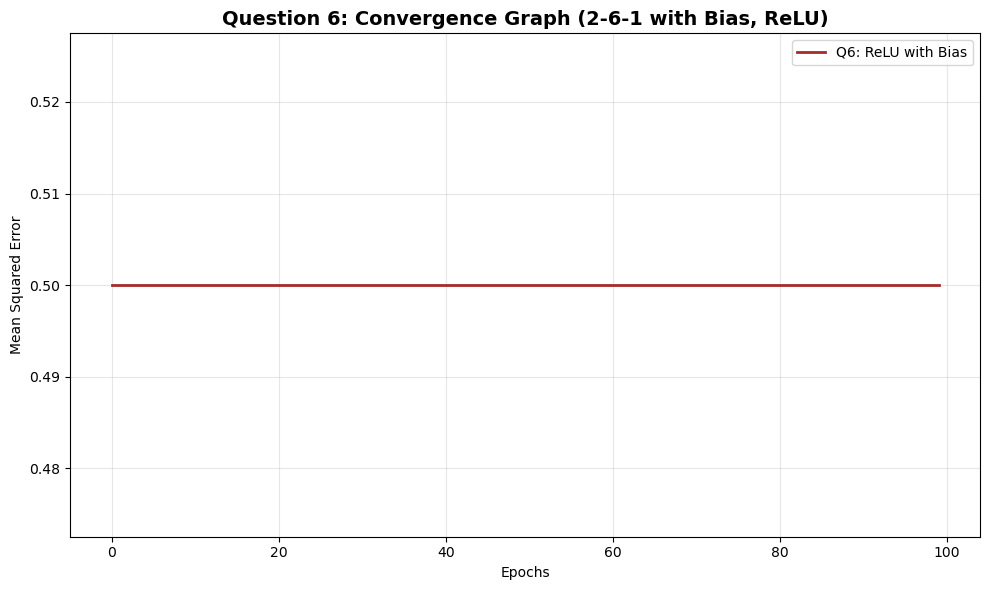

Q6 Final Error: 0.500000
------------------------------------------------------------


In [25]:
# Question 6: Train the 2-6-1 network with bias and ReLU activations
print("="*60)
print("QUESTION 6: 2-6-1 ARCHITECTURE (BIAS + ReLU)")
print("="*60)

# Create and train Q6 network
mlp_q6 = EnhancedMultilayerPerceptron(input_size=2, hidden_size=6, output_size=1, 
                                      use_bias=True, hidden_activation='relu', output_activation='relu')
errors_q6 = mlp_q6.train(X, y, epochs=100)

# Test the trained network
print("Final predictions for Q6:")
for i in range(len(X)):
    prediction = mlp_q6.predict(X[i].reshape(1, -1))[1]
    print(f"Input: {X[i]}, Target: {y[i][0]}, Prediction: {prediction[0][0]:.4f}")

# Calculate and display accuracy
predictions_q6 = [mlp_q6.predict(X[i].reshape(1, -1))[1] for i in range(len(X))]
accuracy_q6 = sum(1 for i in range(len(X)) if abs(predictions_q6[i][0][0] - y[i][0]) < 0.5) / len(X) * 100
print(f"Q6 Accuracy: {accuracy_q6:.1f}%")

# Plot convergence graph for Q6
plt.figure(figsize=(10, 6))
plt.plot(errors_q6, 'brown', linewidth=2, label='Q6: ReLU with Bias')
plt.title('Question 6: Convergence Graph (2-6-1 with Bias, ReLU)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Q6 Final Error: {errors_q6[-1]:.6f}")
print("-" * 60)